# Retweet prediction from twitter dataset

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import csv
import json

from collections import Counter
import ast

importing the datset

In [3]:
df=pd.read_excel(r"file:///C:\Users\prakruthi\Desktop\task\DS%20Tweet.xlsx")

In [4]:
df.head() #extracting first 5 rows

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,...,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,...,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,...,"Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,...,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


In [5]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.notebook_repr_html', True)

In [6]:
import datetime
import time
from datetime import datetime
from datetime import date

In [7]:
df.shape

(42368, 32)

In [8]:
df.isnull().sum()   #checking if there are any null values

TweetPostedTime                  0
TweetID                          0
TweetBody                        0
TweetRetweetFlag                 0
TweetSource                      0
TweetInReplyToStatusID       42267
TweetInReplyToUserID         42179
TweetInReplyToScreenName     42179
TweetRetweetCount                0
TweetFavoritesCount              0
TweetHashtags                  100
TweetPlaceID                 41368
TweetPlaceName               41368
TweetPlaceFullName           41368
TweetCountry                 41369
TweetPlaceBoundingBox        41368
TweetPlaceAttributes         42368
TweetPlaceContainedWithin    42368
UserID                           0
UserName                         0
UserScreenName                   0
UserLocation                 16026
UserDescription               4364
UserLink                     25769
UserExpandedLink             25806
UserFollowersCount               0
UserFriendsCount                 0
UserListedCount                  0
UserSignupDate      

# Dropping columns with more than 50% Null values

In [9]:
dropcol=[]
for column in df.columns:
    if (df[column].isnull().sum()>(df.shape[0]/2)):
        dropcol.append(column)

In [10]:
dropcol                #columns with more than 50% of null values

['TweetInReplyToStatusID',
 'TweetInReplyToUserID',
 'TweetInReplyToScreenName',
 'TweetPlaceID',
 'TweetPlaceName',
 'TweetPlaceFullName',
 'TweetCountry',
 'TweetPlaceBoundingBox',
 'TweetPlaceAttributes',
 'TweetPlaceContainedWithin',
 'UserLink',
 'UserExpandedLink',
 'tweet.place']

In [11]:
df=df.drop(dropcol,axis=1)     #dropping the dropcol columns in the original dataset for further analysis

In [12]:
df.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",1,0,"Maldives, vacation, travel",3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",1,0,"giftideas, holiday",101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",0,0,"travel, TTOT",42725028,Paula Schuck,inkscrblr,Canada,Thrifty Mom Media social media consulting and ...,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",1,0,"yoga, bresil, meditation, holiday",3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",3065,0,Travel,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0


In [13]:
df.shape    #13 columns have been dropped

(42368, 19)

In [14]:
df.columns

Index(['TweetPostedTime', 'TweetID', 'TweetBody', 'TweetRetweetFlag', 'TweetSource', 'TweetRetweetCount', 'TweetFavoritesCount', 'TweetHashtags', 'UserID', 'UserName', 'UserScreenName', 'UserLocation', 'UserDescription', 'UserFollowersCount', 'UserFriendsCount', 'UserListedCount', 'UserSignupDate', 'UserTweetCount', 'MacroIterationNumber'], dtype='object')

# EDA & Feature engineering

1.Tweet posted time

In [17]:
import datetime

#extract the hour time of the tweet 

In [18]:
df['Time'] =[datetime.datetime.strptime(d, '%a %b %d %H:%M:%S %z %Y') for d in df['TweetPostedTime']]
df['Hour'] = [d.hour for d in df['Time']] 
no_of_tweets=df['Hour'].value_counts()

number of tweets every hour

In [19]:
no_of_tweets  

6     6567
3     6161
1     5577
8     4896
5     3837
2     3589
9     2668
4     2624
10    2327
7     2303
0     1819
Name: Hour, dtype: int64

In [23]:
df['Month'] = [d.month for d in df['Time']] #tweet month information

In [24]:
df['Month']

0        12
1        12
2        12
3        12
4        12
         ..
42363    12
42364    12
42365    12
42366    12
42367    12
Name: Month, Length: 42368, dtype: int64

In [25]:
df['Day'] = [d.day for d in df['Time']]   #tweet days information

In [22]:
df['Day'].value_counts() #20th  has 42368 tweets

20    42368
Name: Day, dtype: int64

Plotting bar graph to see at what hour maximum tweets are twitted

[Text(0.5, 0, '24-H-Format'),
 Text(0, 0.5, 'No. of Tweets'),
 Text(0.5, 1.0, 'Tweets distribution')]

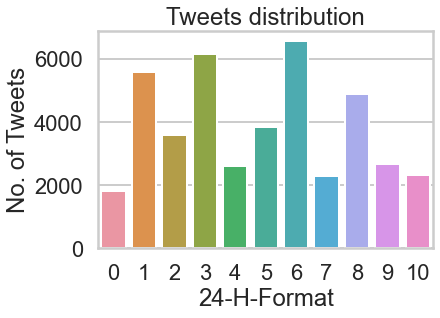

In [21]:
ax=sns.barplot(y=no_of_tweets.values, x=no_of_tweets.index)
ax.set(xlabel='24-H-Format', ylabel='No. of Tweets',title='Tweets distribution')

From the above graph we can infer that,

At 6 Am maximum tweets were retweeted while at 1,3 and 8 am also being peak hours.

Least retweets are made between 12 am to 1 am.

In [22]:
labels=np.array(no_of_tweets.index)  
print(labels)

[ 6  3  1  8  5  2  9  4 10  7  0]


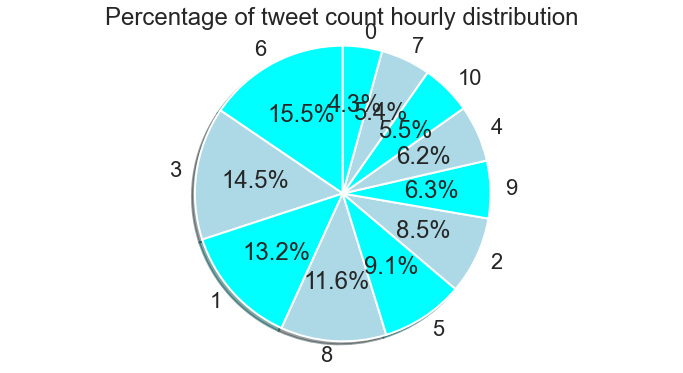

In [23]:

sizes = no_of_tweets.values
colors = ['cyan', 'lightblue']
 
# Plot
plt.figure(figsize=(12,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90) 
plt.title('Percentage of tweet count hourly distribution')

plt.axis('equal') # equal enables the circle shape
plt.show()

In [28]:
# used for extract date and time from TweetPostedTime feature

df['dm'] = df['TweetPostedTime'].str[3:10]
df['t'] = df['TweetPostedTime'].str[10:19]
df['y'] = df['TweetPostedTime'].str[25:]
df['created_at'] = df['dm'].astype(str)+' '+df['y']+' '+df['t']

df["hour_posted"] = df['TweetPostedTime'].str[10:13]

df['created_at']= pd.to_datetime(df['created_at']) 

df = df.drop(['dm', 't', 'y'], axis = 1)

In [32]:
import datetime
import time
from datetime import datetime
from datetime import date

In [33]:
date_objects = [datetime.strptime(str(each), '%Y-%m-%d %H:%M:%S') for each in df['created_at']]

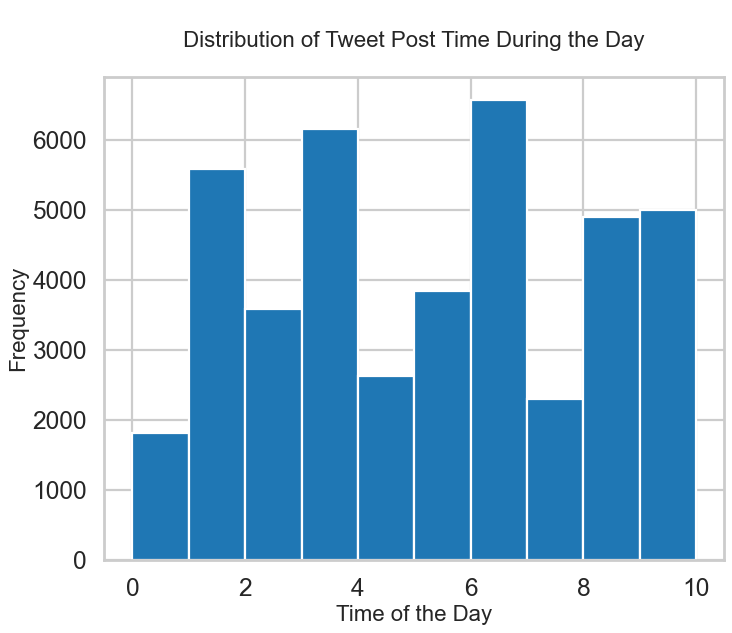

In [34]:
hour_objects = [each.hour for each in date_objects]

plt.figure(figsize=(10, 8), dpi=80)
plt.hist(hour_objects)
plt.title("\n Distribution of Tweet Post Time During the Day \n", size = 20)
plt.xlabel('Time of the Day', size=20)
plt.ylabel('Frequency', size=20)
plt.show()

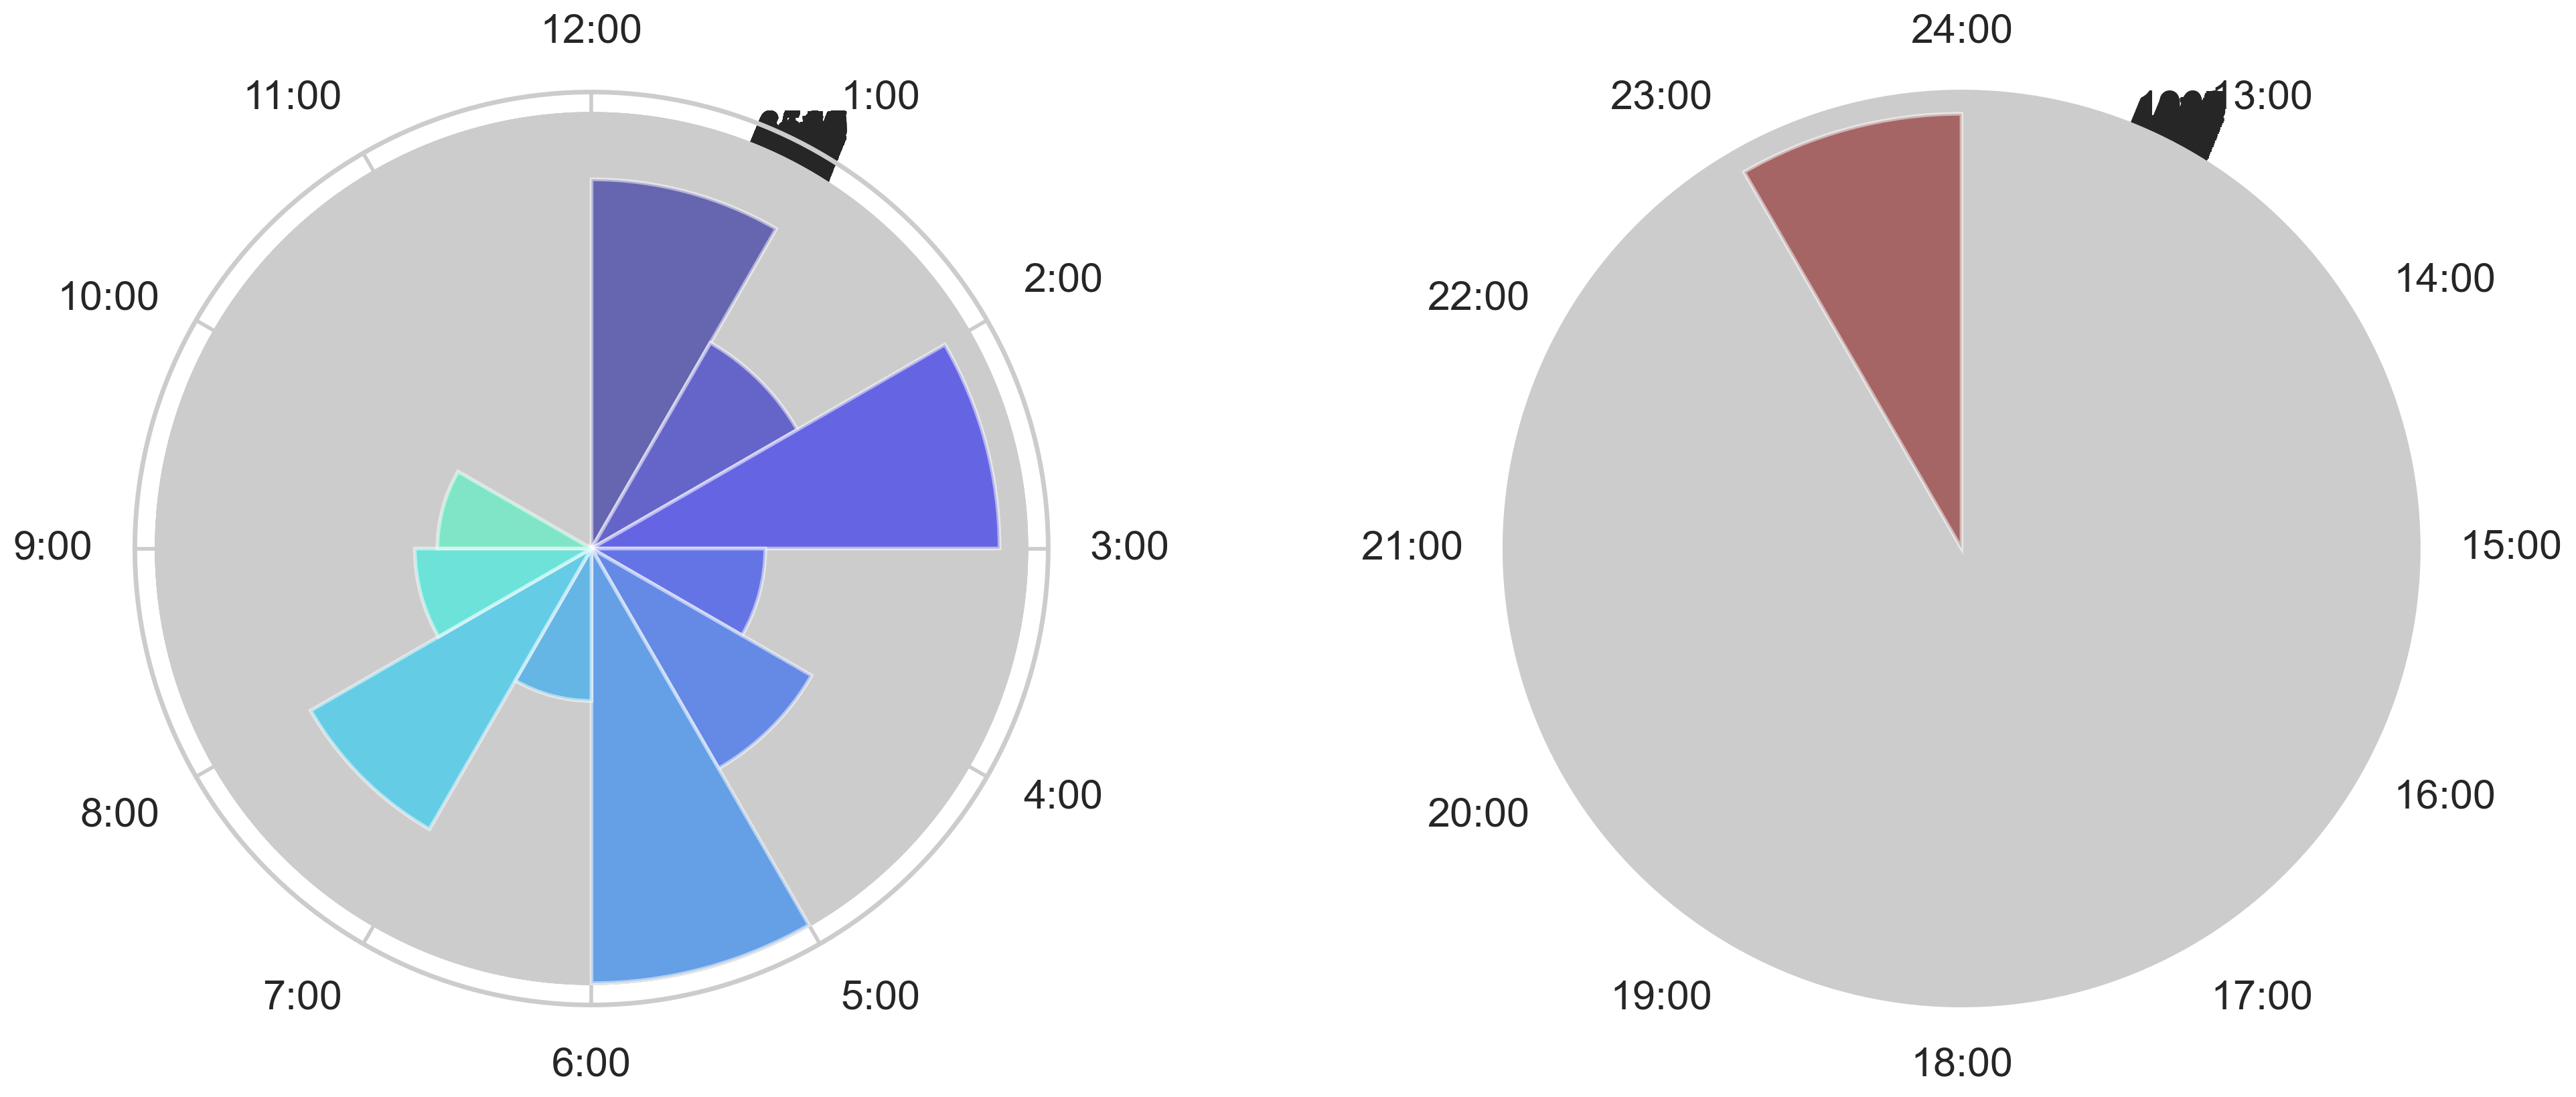

In [36]:
import matplotlib.ticker as tkr

def main():
    data = hour_objects
    axes = plot_clock(data)
    for ax in axes:
        realign_polar_xticks(ax)
    plt.show()

def realign_polar_xticks(ax):
    pass
    for theta, label in zip(ax.get_xticks(), ax.get_xticklabels()):
        theta = theta * ax.get_theta_direction() + ax.get_theta_offset()
        theta = np.pi/2 - theta
        y, x = np.cos(theta), np.sin(theta)
        if x >= 0.1:
            label.set_horizontalalignment('left')
        if x <= -0.1:
            label.set_horizontalalignment('right')
        if y >= 0.5:
            label.set_verticalalignment('bottom')
        if y <= -0.5:
            label.set_verticalalignment('top')

def plot_clock(data):
    def hour_formatAM(x, p):
        hour = x * 6 / np.pi
        return '{:0.0f}:00'.format(hour) if x > 0 else '12:00'

    def hour_formatPM(x, p):
        hour = x * 6 / np.pi
        return '{:0.0f}:00'.format(hour + 12) if x > 0 else '24:00'

    def plot(ax, theta, counts, formatter):
        colors = plt.cm.jet(theta / 12.0)
        ax.bar(theta, counts, width=np.pi/6, color=colors, alpha=0.5)
        ax.xaxis.set_major_formatter(tkr.FuncFormatter(formatter))

    plt.rcParams['font.size'] = 8

    bins = np.r_[0, 0.5:12, 12, 12.5:24,  23.99999]
    counts = np.histogram(data,bins)[0]

    counts[13] += counts[0]
    counts[-1] += counts[13]

    fig, axes = plt.subplots(ncols=2, figsize=(22, 12), dpi=200,
                             subplot_kw=dict(projection='polar'))
    fig.subplots_adjust(wspace=0.5)

    for ax in axes:
        ax.set(theta_offset=np.pi/2, theta_direction=-1,
               xticks=np.arange(0, np.pi*2, np.pi/6),
               yticks=np.arange(1, counts.max()))

    plot(axes[0], bins[1:13] * np.pi / 6, counts[1:13], hour_formatAM)
    plot(axes[1], bins[14:26] * np.pi / 6, counts[14:26], hour_formatPM)
    return axes

main()


In [37]:
df.columns

Index(['TweetPostedTime', 'TweetID', 'TweetBody', 'TweetRetweetFlag', 'TweetSource', 'TweetRetweetCount', 'TweetFavoritesCount', 'TweetHashtags', 'UserID', 'UserName', 'UserScreenName', 'UserLocation', 'UserDescription', 'UserFollowersCount', 'UserFriendsCount', 'UserListedCount', 'UserSignupDate', 'UserTweetCount', 'MacroIterationNumber', 'Time', 'Hour', 'Month', 'Day', 'created_at', 'hour_posted'], dtype='object')

top users having highest retweet count

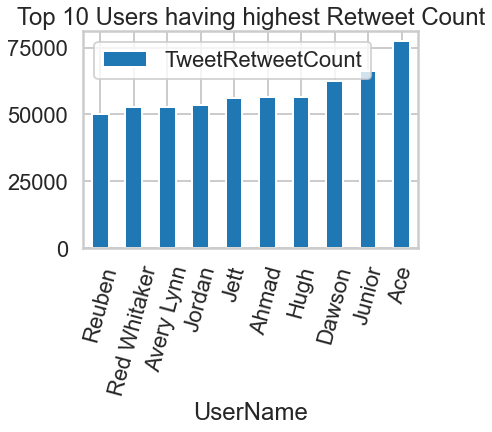

In [39]:
df.groupby('UserName').agg('sum').sort_values('TweetRetweetCount').reset_index().tail(10).plot(x='UserName',y='TweetRetweetCount',kind='bar')
plt.title('Top 10 Users having highest Retweet Count')
plt.xticks(rotation=75)
plt.show()

### Top 10 Users having highest UserFollowers Count

D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128042 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\prakruthi\anaconda3\envs\image\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128042 missing from current font.
  font.set_text(s, 0, flags=flags)


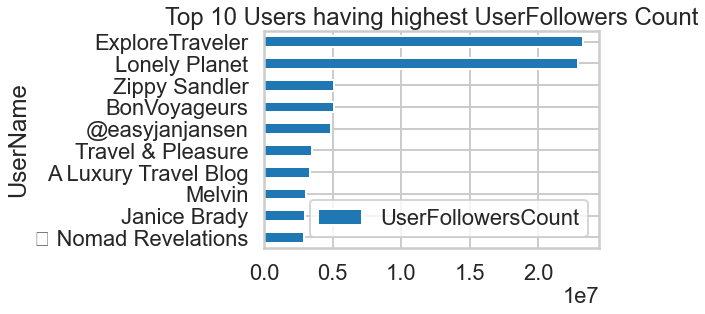

In [25]:
df.groupby('UserName').agg('sum').sort_values('UserFollowersCount').reset_index().tail(10).plot(x='UserName',y='UserFollowersCount',kind='barh')
plt.title('Top 10 Users having highest UserFollowers Count')
plt.show()

# Top 10 Users having highest UserFriends Count

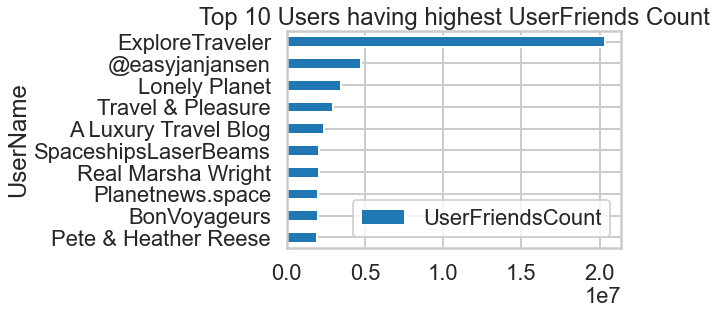

In [40]:
df.groupby('UserName').agg('sum').sort_values('UserFriendsCount').reset_index().tail(10).plot(x='UserName',y='UserFriendsCount',kind='barh')
plt.title('Top 10 Users having highest UserFriends Count')
plt.show()

# we can observe that 5-6am there are maximum retweet counts

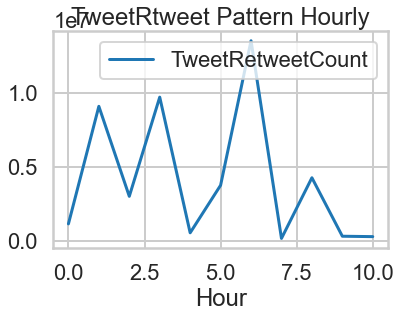

In [42]:
df.groupby('Hour').agg('sum').sort_values('Hour').reset_index().plot(x='Hour',y='TweetRetweetCount')
plt.title('TweetRtweet Pattern Hourly')
plt.show()

## boxplot depiction of hourly tweet distribution

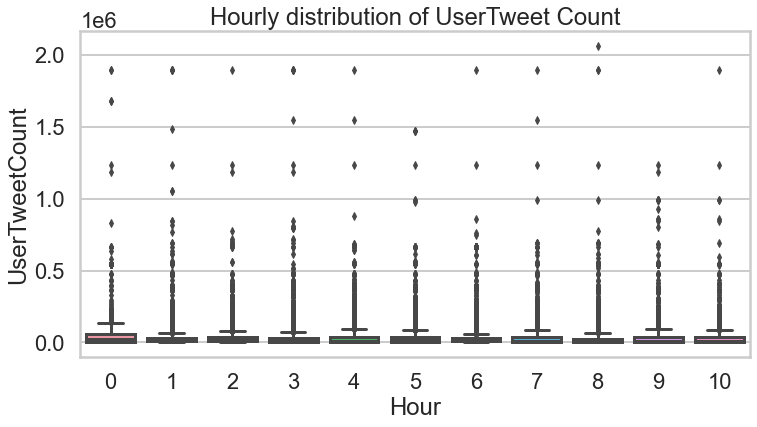

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Hour',y='UserTweetCount',data=df)
plt.title('Hourly distribution of UserTweet Count')
plt.show()

### Top 10 Locations having highest UserTweet Count

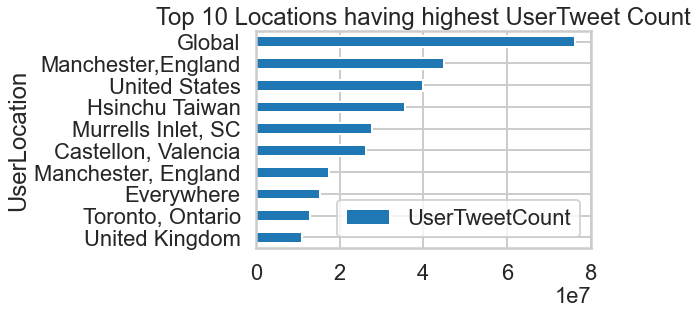

In [46]:
df.groupby('UserLocation').agg('sum').sort_values('UserTweetCount').reset_index().tail(10).plot(x='UserLocation',y='UserTweetCount',kind='barh')
plt.title('Top 10 Locations having highest UserTweet Count')
plt.show()

In [47]:
df["TweetRetweetCount"].unique()     #unique retweetcounts we have in the data 

array([   1,    0, 3065, 2970,   11,    7,  185,    5,   18,  135,    2,
          3,   69,   61,   60,   32,   36,   50,    4,    9,   22,    8,
         20,   21,  115,   29,   37,  204,   12,   24,   70,   16,  144,
         95,   25,    6,  160,   99,  117,  129,   42,   27,   15,   14,
         10,   19,   64,   17,   39,   91,  188,  132,  314,  254,  101,
        154,  143,  650,   41,   72,   49,  194,   63,   30,  153,   94,
        222,   53,   45,   54,   13,   74,   86,   26,   83,   56,  124,
        119, 3180,   55,  121,   34,   33,   46,   31,   44, 2971,   52,
        171,   78,  252,  202,  177,  106,   48,   75,   84,  111,  149,
       3241,   28,  120,  214,   57, 2973,   23,   51,   96,  113,   87,
        325,   81,  260,  156,   35,   73, 3309,  597,   66,  911,  139,
        497,   40,  125,  228,  742,  743,  321,  217,  219,  354,  133,
        109, 3069,  163,  162,  255,  199,  293,  100,   77,   62,   98,
         71,   38,  108,  116,  668, 3228,  118,  4

In [49]:
df["TweetFavoritesCount"].unique()   #unique tweetfavroite counts in the data

array([   0,    1,    3,    2,    4,    7,    5,    6,    8,   14,   10,
         17,   13,   33,   18,   15,   23,   16,   20,    9,   11,   64,
         27,   24,   21,   12,   25,   32,   28,   26, 2473,   30,   22,
         47, 2557,   44,  118,   48, 2750,   19,  135,   34,   67,   39,
         35,   50, 2687,   29,   59, 2813,  114,   66, 2762,   98,   60,
       2354,   57,   53, 1813,  143, 2584,   36,  151], dtype=int64)

# 2. Tweet Body and Tweet Retweet Flag

### calculating percentage of retweets in all the tweets

In [76]:
Retweets = df[df['TweetRetweetFlag'] == True]
print(f"The percentage of retweets is {round(len(Retweets)/len(df)*100)}% of all the tweets")

The percentage of retweets is 63% of all the tweets


In [77]:
NoRetweets= df[df['TweetRetweetFlag'] == False]
print(f"The percentage of tweets without retweet is {round(len(NoRetweets)/len(df)*100)}% of all the tweets")

The percentage of tweets without retweet is 37% of all the tweets


### A tweet is more likely to be retweeted if it has hashtags and other users mentioned , let's see what pattern this data has

In [78]:
RT_M = df[ (df['TweetBody'].str.count("@") == 2) & (df['TweetRetweetFlag'] == True) ]
print(f"The percentage of retweets with mentions is {round(len(RT_M)/len(Retweets)*100)}% of all the Retweets")

The percentage of retweets with mentions is 64% of all the Retweets


### we observe 64% of retweets are user mentions

In [79]:
RT_NM=df[(df['TweetRetweetFlag'] == True)& (df['TweetBody'].str.count("@") != 2)]
print(f"The percentage of retweets without mentions is {round(len(RT_NM)/len(Retweets)*100)}% of all the Retweets")

The percentage of retweets without mentions is 36% of all the Retweets


# Clearly tweets with user mentions has high percentage to be retweeted

In [80]:
RT_H=df[(df['TweetRetweetFlag'] == True)& df['TweetBody'].str.contains("#")]
print(f"The percentage of retweets with hashtags is {round(len(RT_H)/len(Retweets)*100)}% of all the Retweets")

The percentage of retweets with hashtags is 100% of all the Retweets


In [81]:
RT_NH=df[(df['TweetRetweetFlag'] == True)& (~df['TweetBody'].str.contains("#"))]
print(f"The percentage of retweets without hashtags is {round(len(RT_NH)/len(Retweets)*100)}% of all the Retweets")

The percentage of retweets without hashtags is 0% of all the Retweets


### Percentage of retweets with hashtags is 100% which shows hashtags has a major impact on a tweet to be retweeted for this dataset

In [82]:
NRT_H=df[(df['TweetRetweetFlag'] == False)& df['TweetBody'].str.contains("#") ]
print(f"The percentage of tweets without retweet and with hashtags is {round(len(NRT_H)/len(NoRetweets)*100)}% of all the Retweets")

The percentage of tweets without retweet and with hashtags is 99% of all the Retweets


### But tweets which were not retweeted but has hashtags are 99% , which implies almost all tweets which were not retweeted had hashtags , so hashtag is not that good feature for this dataset
Below is a bar graph for the same

In [83]:
t_y = [ len(Retweets), len(NoRetweets),len(RT_M), len(RT_NM), len(RT_H),len(RT_NH),len(RT_H)]
t_x = ['RT','NRT', 'Mentions', 'No_Menitions ', 'Hashtags' ,'No_Hashtags','              NRT_Hashtags']

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

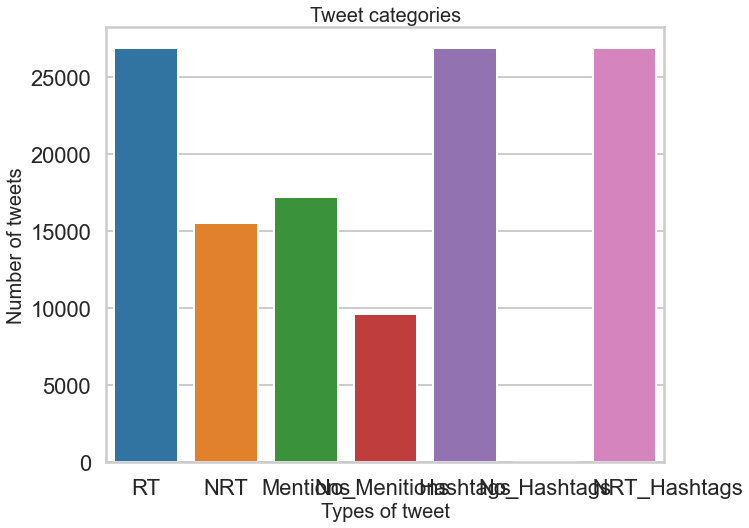

In [85]:
plt.figure(figsize=(10,8))
plt.title('Tweet categories', fontsize = 20)
plt.xlabel('Types of tweet',fontsize = 20)
plt.ylabel('Number of tweets',fontsize = 20)
sns.barplot(x = t_x, y = t_y)

plt.show()

RT- Tweets which are retweeted
  NRT - Tweets which are not retweeted
  Mentions - Retweeted tweet with mentions
  No_mentions - Retweeted tweet without mentions
  Hashtags - Retweeted tweet with hashtags
  No_Hashtags - Retweeted tweet without hashtags
  NRT_Hashtags - Tweets which are not retweeted but had hashtags

### 3. TweetSource
From tweet source, extracted the type of device from which retweet was posted and plotted a bar graph to see which device is used more .

In [86]:
Retweets['TweetSource']

0        <a href="http://twitter.com/download/iphone" r...
1        <a href="http://twitter.com/download/iphone" r...
3        <a href="https://roundteam.co" rel="nofollow">...
4        <a href="http://twitter.com" rel="nofollow">Tw...
5        <a href="http://twitter.com" rel="nofollow">Tw...
                               ...                        
42361    <a href="http://twitter.com" rel="nofollow">Tw...
42362    <a href="http://twitter.com" rel="nofollow">Tw...
42365    <a href="http://twitter.com" rel="nofollow">Tw...
42366    <a href="http://twitter.com" rel="nofollow">Tw...
42367    <a href="http://twitter.com" rel="nofollow">Tw...
Name: TweetSource, Length: 26862, dtype: object

In [87]:
Retweets['TweetSource']=Retweets['TweetSource'].apply(lambda x :x.split('>')[1].split('<')[0])

<ipython-input-87-0fc21545eafd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Retweets['TweetSource']=Retweets['TweetSource'].apply(lambda x :x.split('>')[1].split('<')[0])


In [88]:
Retweets['TweetSource']=Retweets['TweetSource'].apply(lambda x :x.lower())

<ipython-input-88-f3a597f37977>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Retweets['TweetSource']=Retweets['TweetSource'].apply(lambda x :x.lower())


### extracting different type of devices in device type

In [92]:
Web=Retweets[Retweets['TweetSource'].str.contains("web")]
Web_l=len(Web)
iPhone_iPad=Retweets[Retweets['TweetSource'].str.contains("iphone") | Retweets['TweetSource'].str.contains("ipad")]
iPhone_l=len(iPhone_iPad)
Android=Retweets[Retweets['TweetSource'].str.contains("android")]
Android_l=len(Android)
App=Retweets[Retweets['TweetSource'].str.contains("app")]
App_l=len(App)
Instagram_Facebook=Retweets[Retweets['TweetSource'].str.contains("instagram") | Retweets['TweetSource'].str.contains("facebook")]
Insta_Fb=len(Instagram_Facebook)

In [93]:
Bot=Retweets[Retweets['TweetSource'].str.contains("bot")]
Bot_l=len(Bot)
drop=pd.concat([Web,App,iPhone_iPad,Android,Instagram_Facebook,Bot])
other_websites=Retweets.drop(index=drop.index)
web_apps=len(other_websites)

In [94]:
r_y = [Web_l,App_l,iPhone_l,Android_l,Insta_Fb,Bot_l,web_apps]
r_x = ['Web','Apps','iPhone_iPad','Android','Insta_Fb','Bot','other_webApps']

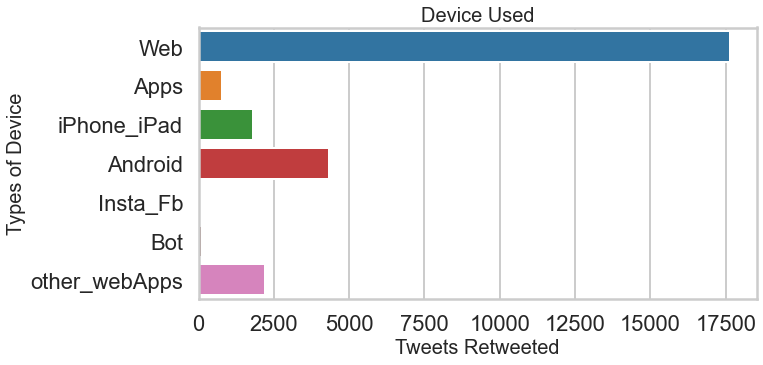

In [95]:
plt.figure(figsize=(10,5))
plt.title('Device Used', fontsize = 20)
plt.ylabel('Types of Device',fontsize = 20)
plt.xlabel('Tweets Retweeted',fontsize = 20)
sns.barplot(x = r_y, y = r_x)

plt.show()

### From the above graph we can see, mostly Web browsers are used than mobiles and other apps.

# 4. TweetFavoritesCount -
No of tweets user has liked
Let's see if it has any relation with number of retweets
As retweet count is a continuous variableand this is a regression problem, we will try to see if it has a correlation with any feature and I have plotted graphs accordingly

<AxesSubplot:xlabel='TweetFavoritesCount', ylabel='TweetRetweetCount'>

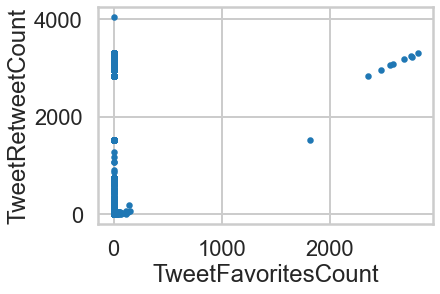

In [96]:
df.plot(kind='scatter', x='TweetFavoritesCount', y='TweetRetweetCount')

Clearly no relation is seen between this two features

# 5. Hashtags
I have created a new column (Hashtags_count) which has count of hashtags used in a tweet
As we saw hashtag was not a great feature , let's see it visually.

In [97]:
Hashtags_count = []
df.TweetHashtags.fillna("no",inplace=True)
for i in range(len(df.TweetHashtags)):
    if df.TweetHashtags[i]== "no":
        Hashtags_count.append(0)
    else:
        Hashtags_count.append((len([j for j in df.TweetHashtags[i].split(",")])))

In [98]:
df['hashtag_count']=Hashtags_count

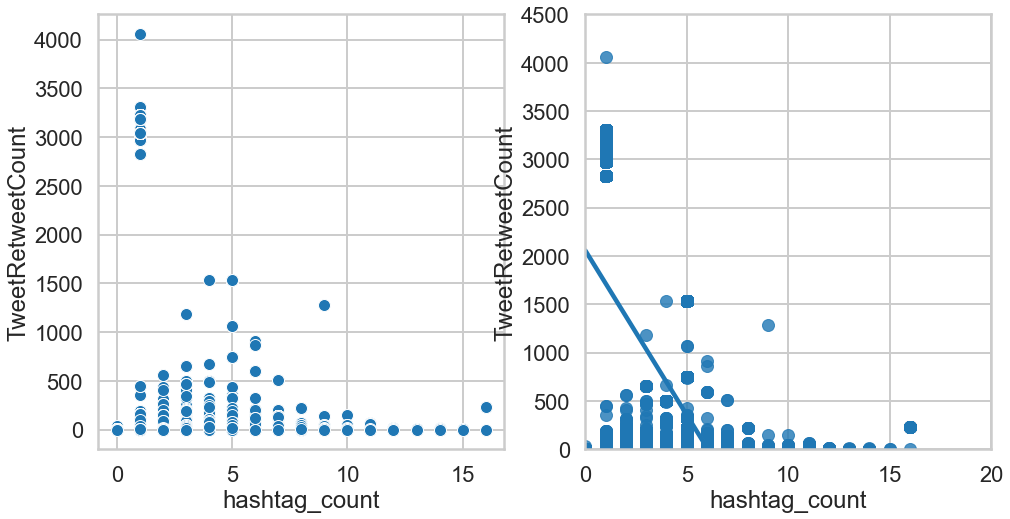

In [99]:
f, axes = plt.subplots(1,2, figsize=(16, 8))

sns.scatterplot(x=df['hashtag_count'],y=df['TweetRetweetCount'],data=df,ax=axes[0])
sns.regplot(x=df['hashtag_count'],y=df['TweetRetweetCount'], ax=axes[1]).set(xlim=(0,20),ylim=(0,4500))
plt.show()

This scatter plot shows expecteed result. Infact it shows a negative regression line.

# 6. UserFollowersCount - No. of followers of a user.
More the no. of followers more should be the retweet count

(20000.0, 25000.0)

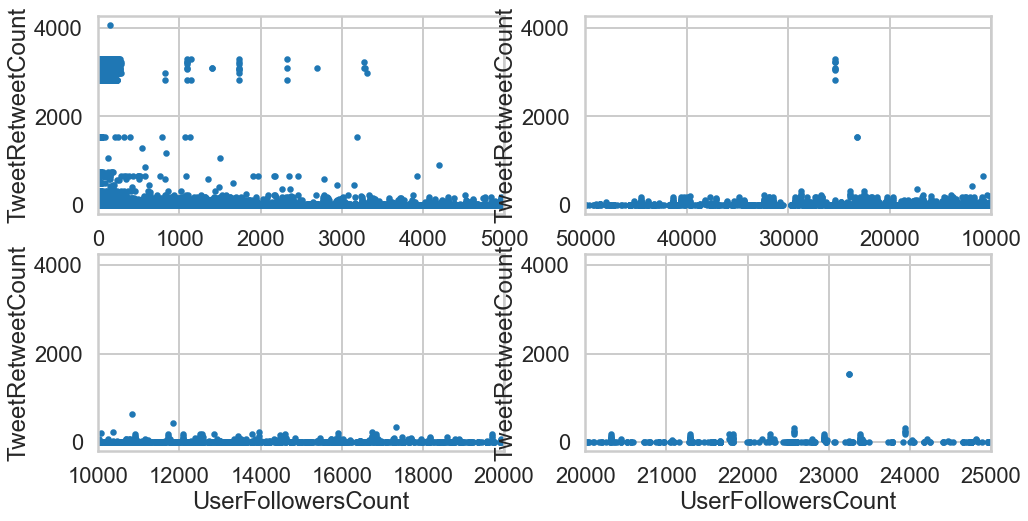

In [100]:
fig, axs = plt.subplots(2, 2)
df.plot(kind='scatter', x='UserFollowersCount', y='TweetRetweetCount',ax=axs[0,0],figsize=(16,8))
df.plot(kind='scatter', x='UserFollowersCount', y='TweetRetweetCount', ax=axs[0,1])
df.plot(kind='scatter', x='UserFollowersCount', y='TweetRetweetCount', ax=axs[1,0])
df.plot(kind='scatter', x='UserFollowersCount', y='TweetRetweetCount', ax=axs[1,1])
axs[0,0].set_xlim(0,5000)
axs[0,1].set_xlim(50000,10000)
axs[1,0].set_xlim(10000,20000)
axs[1,1].set_xlim(20000,25000)

### I have plotted graph for different range of followers , still user followers count does not show and good relation with retweet count for this dataset
Next I have plotted graphs for features - Friends count , Listed Count , Tweet count and MacoIterationNumber w.r.t retweet count to see the relation.

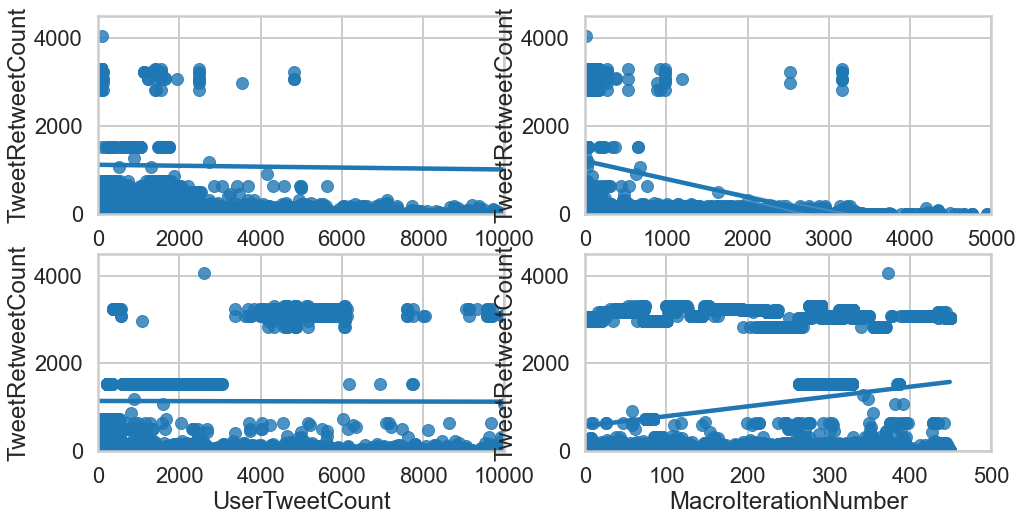

In [101]:
f, axes = plt.subplots(2, 2, figsize=(16, 8))
sns.regplot(x=df['UserFriendsCount'],y=df['TweetRetweetCount'] ,ax=axes[0, 0]).set(xlim=(0,10000),ylim=(0,4500))
    
sns.regplot(x=df['UserListedCount'],y=df['TweetRetweetCount'], ax=axes[0, 1]).set(xlim=(0,5000),ylim=(0,4500))

sns.regplot(x=df['UserTweetCount'],y=df['TweetRetweetCount'], ax=axes[1, 0]).set(xlim=(0,10000),ylim=(0,4500))

sns.regplot(x=df['MacroIterationNumber'],y=df['TweetRetweetCount'], ax=axes[1, 1]).set(xlim=(0,500),ylim=(0,4500))

plt.show()

### we can see from the graphs that no feature has a major impact on retweet count
From UserSignupDate I have sliced the year of sign up
The older the user the chances for tweet to be retweeted should be more

In [102]:
df['UserSignupYear']=df['UserSignupDate'].apply(lambda x:x[-4:])
df['UserSignupYear']=df['UserSignupYear'].astype(int)
df['UserSignupYear'].head()

0    2015
1    2010
2    2009
3    2015
4    2016
Name: UserSignupYear, dtype: int32

<AxesSubplot:xlabel='UserSignupYear', ylabel='TweetRetweetCount'>

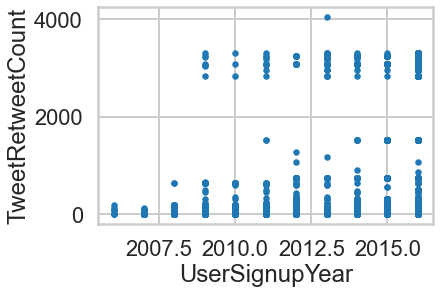

In [103]:
df.plot(kind='scatter', x='UserSignupYear', y='TweetRetweetCount')

But this feature also does not show good correlation

No feature is showing the expected relation , the reason being that this data is only for few hours of one day.

Let's see correlation of each feature visually

<AxesSubplot:>

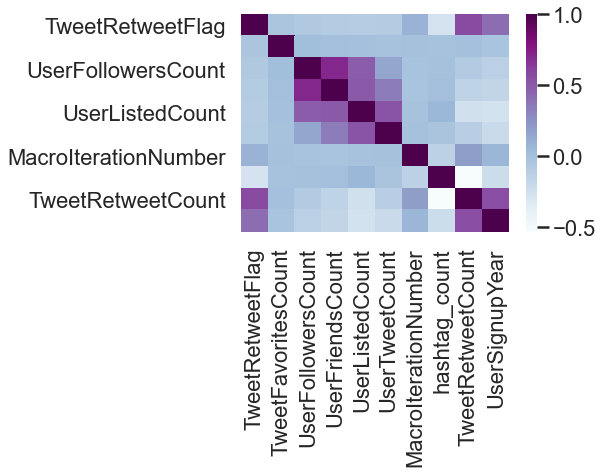

In [104]:
corr=df[['TweetRetweetFlag','TweetFavoritesCount','UserFollowersCount','UserFriendsCount','UserListedCount',
         'UserTweetCount','MacroIterationNumber','hashtag_count','TweetRetweetCount','UserSignupYear']]

heat=corr.corr()

sns.heatmap(heat,cmap='BuPu')

#### considering the correlation we add the TweetRetweetFlag column for our data

In [105]:
df_final=corr
df_final['TweetRetweetFlag']= df_final['TweetRetweetFlag'].astype(int)
df_final.head()

<ipython-input-105-9f6dbaebfc8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['TweetRetweetFlag']= df_final['TweetRetweetFlag'].astype(int)


,TweetRetweetFlag,TweetFavoritesCount,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,MacroIterationNumber,hashtag_count,TweetRetweetCount,UserSignupYear
0,1,0,6334,6144,1917,33556,0,3,1,2015
1,1,0,154,371,180,3201,0,2,1,2010
2,0,0,23433,24762,961,147958,0,2,0,2009
3,1,0,11136,10081,978,28988,0,4,1,2015
4,1,0,55,21,31,19581,0,1,3065,2016


In [106]:
#Data normalisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_final)

StandardScaler()

In [195]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df_final.drop('TweetRetweetCount',axis=1)
Y= df_final.TweetRetweetCount

In [196]:
Y1=np.sqrt(Y)   #applying square root transformation on output variable

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.3)

In [199]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred0=lr.predict(X_test)   #predicting for the test data

In [217]:
import sklearn.metrics as metrics

trainlr =lr.score(X_train,y_train)
trainlr   #calculating train accuracy 63.9%

0.6393548380962615

In [213]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [214]:
np.sqrt(mean_squared_error(y_test, y_pred0))

15.045619938430901

In [215]:
mean_absolute_error(y_test, y_pred0)

12.787012761244396

In [216]:
r2_score(y_test,y_pred0)   # test accuracy 63.8%

0.6385376533641144

### without transformation the accuracy is 60 % but after applying sqrt transformation on dependent variable we see increase in accuracy

Accuracy for linear regression model 63.41% which is good for this dataset

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.3) #passing Y1 which is sqrt transformed

In [162]:
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred0=lr.predict(X_test)

In [163]:
from statsmodels.formula.api import poisson
from statsmodels.formula.api import negativebinomial

import statsmodels.api as sm

In [164]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [165]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      TweetRetweetCount   No. Observations:                29657
Model:                            GLM   Df Residuals:                    29648
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5360e+05
Date:                Tue, 10 Nov 2020   Deviance:                   2.1533e+05
Time:                        13:27:20   Pearson chi2:                 4.66e+13
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
TweetRetweetFlag         4.5837 

In [166]:
print('variance='+str(df['TweetRetweetCount'].var()))
print('mean='+str(df['TweetRetweetCount'].mean()))

variance=2051980.5033253313
mean=1081.0954021903324


### The variance is clearly much greater than the mean. The data is grossly over-dispersed and the primary assumption of the Poisson model does not hold.

In [167]:
print(len(poisson_training_results.mu))

29657


In [168]:
print(poisson_training_results.mu)

[ 0.56434994  0.07029266  0.13032944 ...  0.12087154 14.41217974
 14.46908987]


## Negative binomial distribution

STEP1: fitting the Poisson regression model.

STEP2: apply alpha value and fit gor the Negative Binomial regression 

In [173]:
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=0.004)).fit()

In [174]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      TweetRetweetCount   No. Observations:                29657
Model:                            GLM   Df Residuals:                    29648
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4785e+05
Date:                Tue, 10 Nov 2020   Deviance:                   2.0153e+05
Time:                        13:32:41   Pearson chi2:                 2.66e+11
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
TweetRetweetFlag         4.5987 

In [175]:
nb2_predictions = nb2_training_results.get_prediction(X_test)

In [176]:
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

            mean   mean_se  mean_ci_lower  mean_ci_upper
10281   0.312306  0.006692       0.299461       0.325702
23633   0.105053  0.002270       0.100696       0.109598
7530   43.141003  0.110534      42.924903      43.358190
19782   0.151864  0.003267       0.145593       0.158405
24744   0.245501  0.005250       0.235424       0.256009
...          ...       ...            ...            ...
12116   0.196010  0.004266       0.187825       0.204551
37879  54.290804  0.118805      54.058449      54.524157
13206  46.100681  0.097168      45.910628      46.291521
33693   3.786138  0.029773       3.728230       3.844944
18254   0.103437  0.002233       0.099153       0.107908

[12711 rows x 4 columns]


### mean_se is the standard forecasted error and mean is the forecasted value

# Support Vector Regression

In [219]:
from sklearn.svm import SVR

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
clf = SVR(kernel='rbf')
clf.fit(X_train, y_train)

SVR()

In [227]:
y1_pred=clf.predict(X_test)
trainsvm =clf.score(X_train,y_train)
trainsvm           #train accuracy for support vector machine -44%

-0.44275672660723764

In [228]:
np.sqrt(mean_squared_error(y_test, y1_pred))

1709.3192198761672

In [229]:
mean_absolute_error(y_test, y1_pred)

1055.2089387078777

In [230]:
r2_score(y_test,y1_pred)   #test accuracy for SVM -43%

-0.43351598412061976

support vector regression gets negative R2 value , R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line

# Random Forest Regression

In [232]:
from sklearn.ensemble import RandomForestRegressor

In [233]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [243]:
trainrfg =rf.score(X_train,y_train)
trainrfg    #train accuracy for randomforest regressor  99.9%


0.9990187160988786

In [242]:
y2_pred=rf.predict(X_test)

In [239]:
np.sqrt(mean_squared_error(y_test, y2_pred))

125.02820116263476

In [240]:
mean_absolute_error(y_test, y2_pred)

17.175786737910332

In [241]:
r2_score(y_test,y2_pred)   #test accuracy 99.2%

0.9923141712637782

### Random forest regression gives 99.26% accuracy

In [244]:
print("Actual vs Predicted using Random Forest")
pd.DataFrame({'Predicted Retweet':y2_pred,'Actual Retweets':y_test})

Actual vs Predicted using Random Forest


,Predicted Retweet,Actual Retweets
7472,743.0000,743
29032,104.0700,106
26819,3309.0000,3309
23024,0.1300,0
16420,3241.0000,3241
...,...,...
29314,1536.0000,1536
19461,29.7175,14
26336,3309.0000,3309
10539,0.0000,0


# Polynomial Regression

In [245]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, interaction_only=True)
output_nparray = poly.fit_transform(df_final)
output_df = pd.DataFrame(output_nparray)

X1=output_df

In [246]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=0.3)
lr1=LinearRegression()
lr1.fit(X1_train,y1_train)

LinearRegression()

In [249]:
y3_pred=lr1.predict(X1_test)
trainpoly =lr1.score(X1_train,y1_train)
trainpoly      #train accuracy is 100%

1.0

In [81]:

np.sqrt(mean_squared_error(y1_test, y3_pred))


3.7390704341282836e-07

In [1]:
mean_absolute_error(y1_test, y3_pred)

NameError: name 'mean_absolute_error' is not defined

In [83]:
r2_score(y1_test,y3_pred)    #testing accuracy is 100%

1.0

# Polynomial Regression model gives 100% accuracy

In [84]:
print("Actual vs Predicted using Random Forest")
pd.DataFrame({'Predicted Retweet':y3_pred,'Actual Retweets':y1_test})

Actual vs Predicted using Random Forest


,Predicted Retweet,Actual Retweets
23440,9.138597e-09,0
30768,1.536000e+03,1536
27798,9.222786e-09,0
13232,3.069000e+03,3069
25553,9.453612e-09,0
...,...,...
3876,5.647076e-09,0
2538,5.879816e-09,0
17879,3.241000e+03,3241
343,4.200000e+01,42


In [261]:
Eva_Mtx={'Model':['Linear Regression','Support Vector Regressor','Random Forest Regressor','Polynomial Regression' ],'RMSE':'NA','MEA':'NA','R_Square':'NA'}
Eva_Mtx=pd.DataFrame(Eva_Mtx)
Eva_Mtx.set_index(['Model'],inplace=True)
Eva_Mtx

,RMSE,MEA,R_Square
Model,,,
Linear Regression,NA,NA,NA
Support Vector Regressor,NA,NA,NA
Random Forest Regressor,NA,NA,NA
Polynomial Regression,NA,NA,NA


In [258]:
yh=[lr.predict(X_test),clf.predict(X_test),rf.predict(X_test)]

In [262]:
for n in range(0,1):
    for m in range(0,4):
        if(m==3):
            Eva_Mtx.iloc[m][n]=np.sqrt(mean_squared_error(y1_test, y3_pred))
            break
            
        Eva_Mtx.iloc[m][n]=np.sqrt(mean_squared_error(y_test, yh[m]))
        
for n in range(1,2):
    for m in range(0,4):
        if(m==3):
            Eva_Mtx.iloc[m][n]=mean_absolute_error(y1_test, y3_pred)
            break
            
        Eva_Mtx.iloc[m][n]=mean_absolute_error(y_test, yh[m])

for n in range(2,3):
    for m in range(0,4):
        if(m==3):
            Eva_Mtx.iloc[m][n]=r2_score(y1_test, y3_pred)
            break
            
        Eva_Mtx.iloc[m][n]=r2_score(y_test, yh[m])        
       

Eva_Mtx

,RMSE,MEA,R_Square
Model,,,
Linear Regression,1755.03,1053.24,-0.514415
Support Vector Regressor,1704.78,1049.73,-0.428928
Random Forest Regressor,125.028,17.1758,0.992314
Polynomial Regression,1.45898e-07,1.1272e-08,1


# We can tell that Polynomial Regression is the best model where in the RMSE,MEA are very less and R-square value i.e, Accuracy is 100% 

hyper parameter tuning

In [263]:
from sklearn.model_selection import GridSearchCV

In [264]:
from pprint import pprint

In [265]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to aconsider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:

# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

# Voting technique

In [270]:
# Import the required libraries
from sklearn import datasets, linear_model, svm, neighbors, naive_bayes
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = linear_model.Perceptron(tol=1e-2, random_state=0)
learner_3 = svm.SVC(gamma=0.001)

# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_1),
                           ('Prc', learner_2),
                           ('SVM', learner_3)])

# Fit classifier with the training data
voting.fit(X_train, y_train)

# Predict the most voted class
hard_predictions = voting.predict(X_test)

# Accuracy of hard voting
print('Hard Voting:', accuracy_score(y_test, hard_predictions))

In [ ]:
# Soft Voting # 
# Instantiate the learners (classifiers)
learner_4 = neighbors.KNeighborsClassifier(n_neighbors = 5)
learner_5 = naive_bayes.GaussianNB()
learner_6 = svm.SVC(gamma = 0.001, probability = True)

# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_4),
                           ('NB', learner_5),
                           ('SVM', learner_6)],
                            voting = 'soft')

# Fit classifier with the training data
voting.fit(X_train, y_train)
learner_4.fit(X_train, y_train)
learner_5.fit(X_train, y_train)
learner_6.fit(X_train, y_train)

# Predict the most probable class
hard_predictions = voting.predict(X_test)

# Get the base learner predictions
predictions_4 = learner_4.predict(X_test)
predictions_5 = learner_5.predict(X_test)
predictions_6 = learner_6.predict(X_test)

# Accuracies of base learners
print('L4:', accuracy_score(y_test, predictions_4))
print('L5:', accuracy_score(y_test, predictions_5))
print('L6:', accuracy_score(y_test, predictions_6))

# Accuracy of Soft voting
print('Soft Voting:', accuracy_score(y_test, hard_predictions))